# File and libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_0_2024_agg_time_pre_proc.csv'

file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [6]:
%run "scripts/dslabs_functions.py"


# Data functions

In [7]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [18]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='E-commerce purchases' # using for testing null values

# target='Sessions' # the target class for project which does not contain nulls


series: Series = data[target]


test_split_threshold = 0.9

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Views                            427 non-null    int64  
 4   Events per session               427 non-null    float64
 5   Item-list view events            427 non-null    int64  
 6   Item view events                 427 non-null    int64  
 7   Add to baskets                   427 non-null    int64  
 8   Checkouts                        427 non-null    int64  
 9   E-commerce purchases             389 non-null    float64
 10  Average purchase revenue         389 non-null    float64
 11  Purchase revenue                 389 non-null    float64
 12  Fir

# Missing Values Analysis

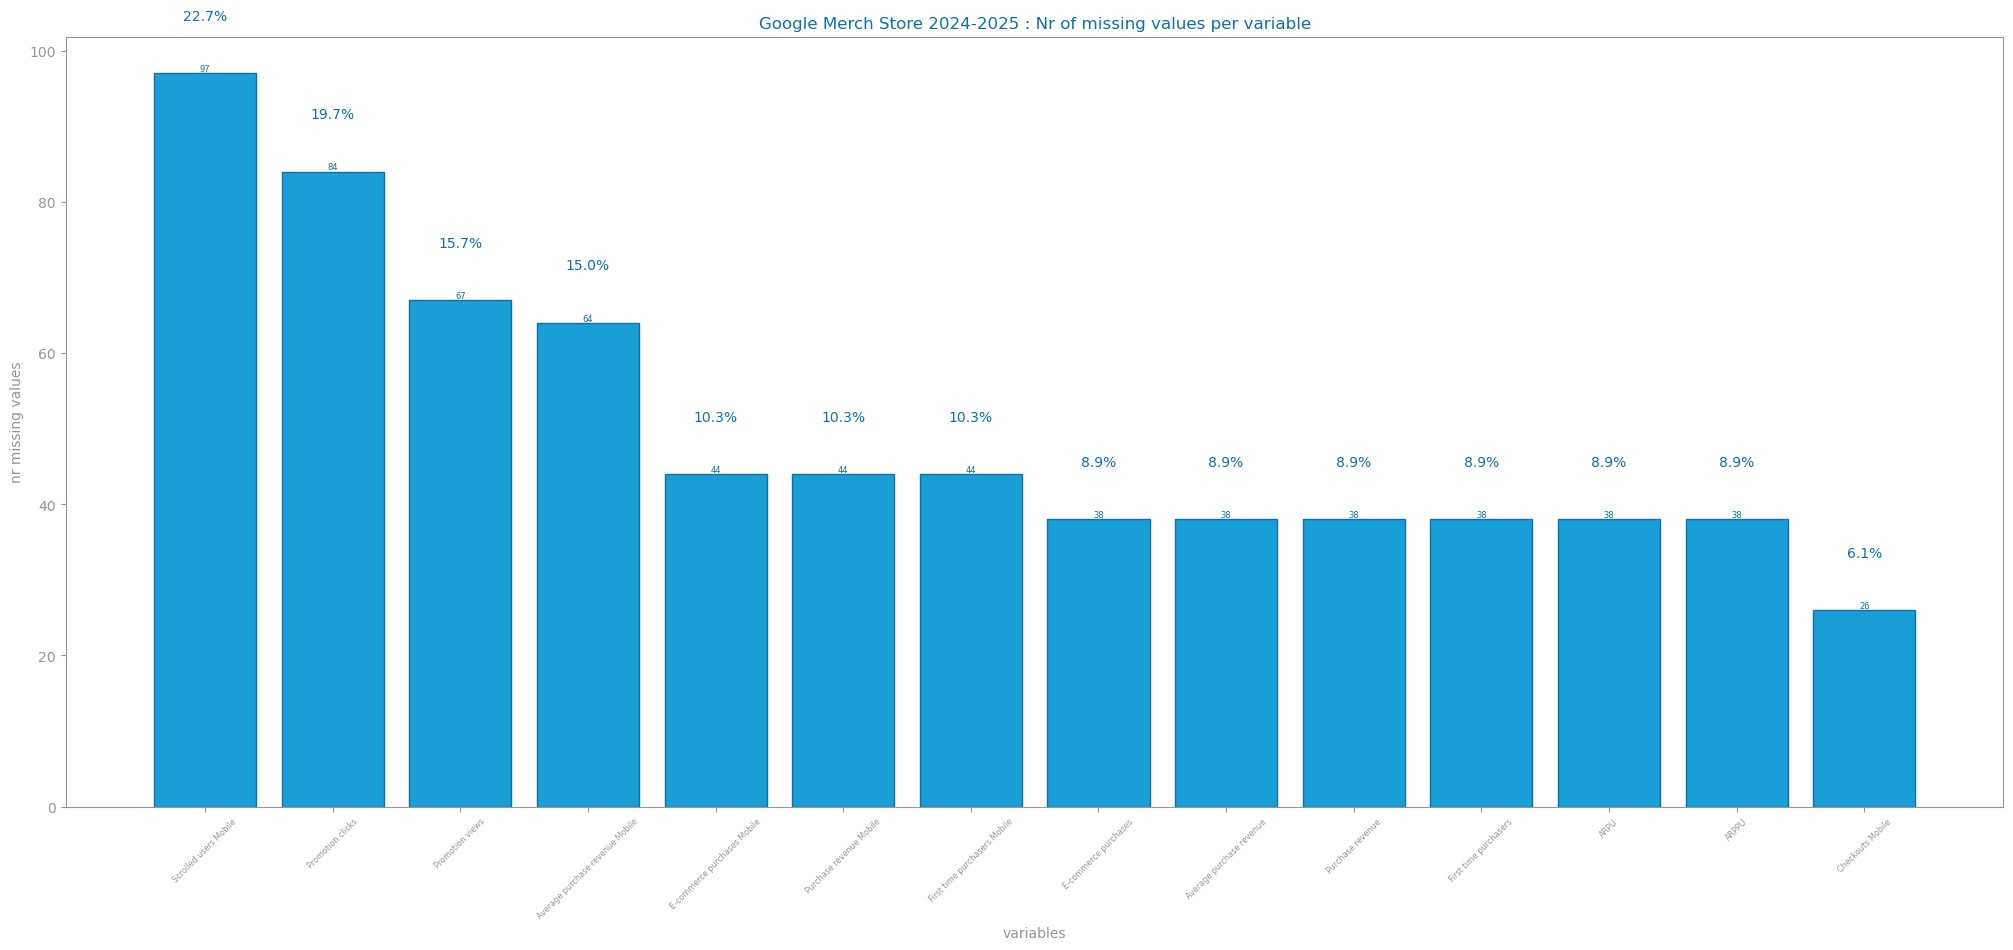

In [19]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - ARIMA

## MV1 strategy apply

In [20]:






# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=fill_missing_values_arima(data, freq='D')

    return df_copy

data_1=apply_strategy_1(data)

series_1: Series = data_1[target]


data_1



Filling missing values for column: E-commerce purchases
Filling missing values for column: Average purchase revenue
Filling missing values for column: Purchase revenue
Filling missing values for column: First time purchasers
Filling missing values for column: ARPU
Filling missing values for column: ARPPU
Filling missing values for column: Promotion views
Filling missing values for column: Promotion clicks
Filling missing values for column: Scrolled users Mobile
Filling missing values for column: Checkouts Mobile
Filling missing values for column: E-commerce purchases Mobile
Filling missing values for column: Average purchase revenue Mobile
Filling missing values for column: Purchase revenue Mobile
Filling missing values for column: First time purchasers Mobile


,Sessions,Seven-day active users,28-day active users,Views,Events per session,Item-list view events,Item view events,Add to baskets,Checkouts,E-commerce purchases,...,Sessions other,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,982,780,780,5111,19.948065,2750,1532,323,99,35.0,...,0.0,50.0,0.000000,0.000000,1,3,0,0,0,0
2024-01-05,887,1433,1433,5000,20.100338,2701,1350,374,97,40.0,...,0.0,45.0,0.000000,0.000000,1,4,0,0,0,0
2024-01-06,426,1748,1748,1920,16.227700,1020,571,81,42,8.0,...,0.0,6.0,0.000000,-1.047198,1,5,1,0,0,0
2024-01-07,446,2081,2081,2129,19.838565,1115,612,126,49,16.0,...,0.0,11.0,0.000000,-1.047198,2,6,1,0,0,0
2024-01-08,981,2749,2749,4745,17.174312,2653,1366,235,66,22.0,...,0.0,56.0,0.000000,-1.047198,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,1298,7458,29843,3392,11.164099,2942,622,100,24,12.0,...,0.0,39.0,1.570796,-1.047198,1,5,1,0,0,0
2025-03-02,1002,7404,29753,3582,14.398204,3248,716,118,44,22.0,...,0.0,32.0,1.570796,-1.047198,2,6,1,0,0,0
2025-03-03,1451,7158,29497,6884,18.512750,7178,1436,305,132,33.0,...,0.0,181.0,1.570796,-1.047198,2,0,0,0,0,0


## MV1 evaluate

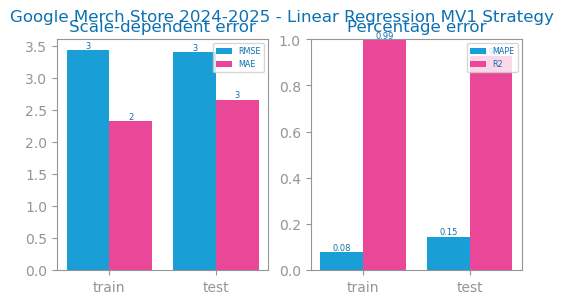

In [21]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression



# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_1 = train_1.drop(columns=[target])
trnY_1 = train_1[target]
tstX_1 = test_1.drop(columns=[target])
tstY_1 = test_1[target]

# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)


plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression MV1 Strategy")
savefig(f"images/{file_tag}_linear_regression_eval.png")

## MV1 Plot Forecast

<Axes: xlabel='Date', ylabel='E-commerce purchases'>

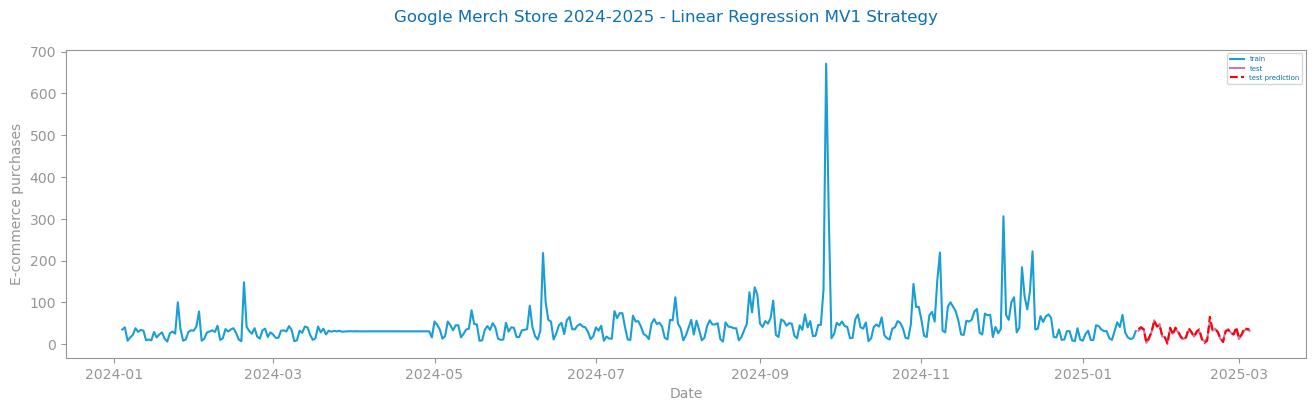

In [22]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Linear Regression MV1 Strategy",
    xlabel='Date',
    ylabel=target,
)

# MV2 - knn fill


## MV2 strategy apply

In [23]:
def apply_strategy_2(df):


    df_copy = mvi_by_filling(df, strategy='knn')

    return df_copy

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## MV2 evaluate

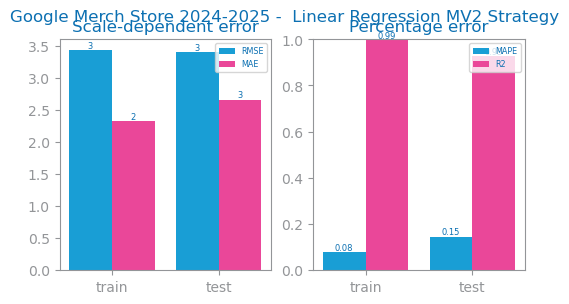

In [24]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_2 = train_2.drop(columns=[target])
trnY_2 = train_2[target]
tstX_2 = test_2.drop(columns=[target])
tstY_2 = test_2[target]

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)


# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} -  Linear Regression MV2 Strategy")
savefig(f"images/{file_tag}_linear_regression_eval.png")

## MV2 Plot Forecast

<Axes: xlabel='Date', ylabel='E-commerce purchases'>

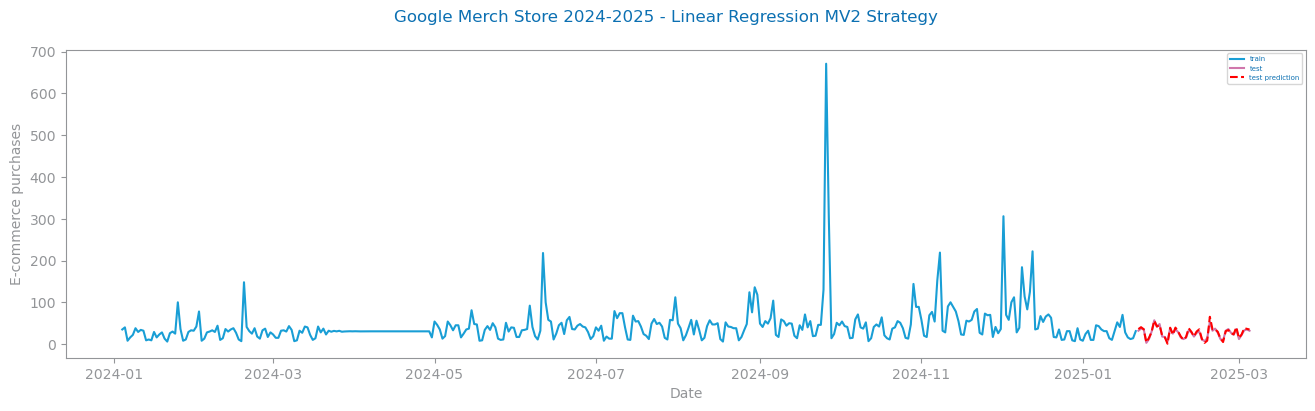

In [25]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Linear Regression MV2 Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate performance metrics for each model
metrics = {
    "Model": ["Arima MV input", "KNN MV input"],
    "MAE": [
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

            Model       MAE        MSE      RMSE        R²       MAPE
0  Arima MV input  2.660182  11.563478  3.400511  0.926421  14.565766
1    KNN MV input  2.660182  11.563478  3.400511  0.926421  14.565766


# save to csv

In [27]:

if test_data==False:
    
    data_copy=data.copy()
    
    
    data_copy=apply_strategy_1(data_copy)
    
    data_copy.reset_index(inplace=True)
    
    
    data_copy.to_csv(f"data/df_merch_0_2024_agg_time_mv_input.csv", index=False)
    

Filling missing values for column: E-commerce purchases
Filling missing values for column: Average purchase revenue
Filling missing values for column: Purchase revenue
Filling missing values for column: First time purchasers
Filling missing values for column: ARPU
Filling missing values for column: ARPPU
Filling missing values for column: Promotion views
Filling missing values for column: Promotion clicks
Filling missing values for column: Scrolled users Mobile
Filling missing values for column: Checkouts Mobile
Filling missing values for column: E-commerce purchases Mobile
Filling missing values for column: Average purchase revenue Mobile
Filling missing values for column: Purchase revenue Mobile
Filling missing values for column: First time purchasers Mobile
